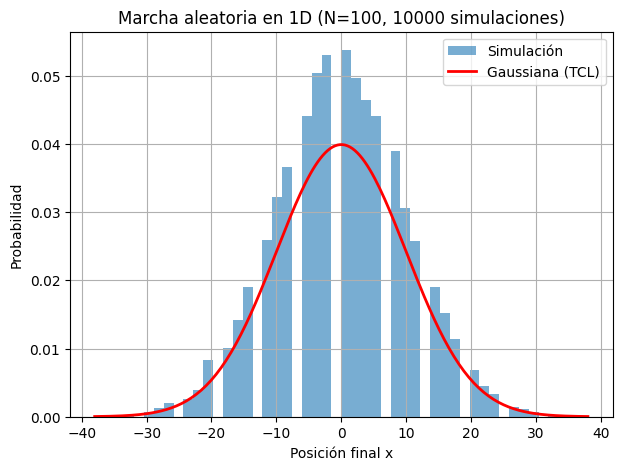

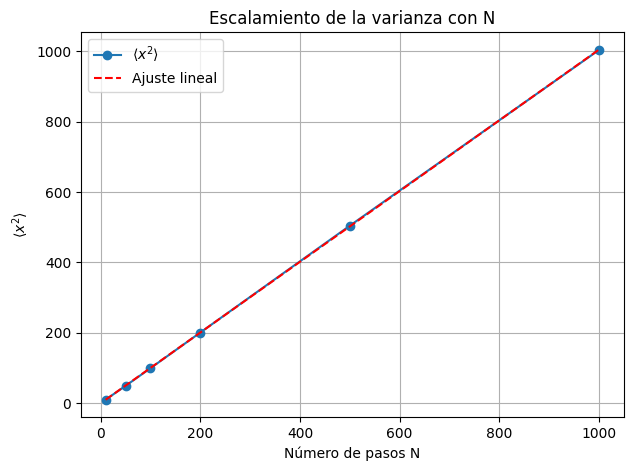

Constante de difusión estimada: D ≈ 0.5021


In [7]:
"""
Autor: [Kennet Alejandro Rodriguez Peña]
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def random_walk_1d(N, step_size=1.0):
    """
    Simula una marcha aleatoria en 1D con N pasos.
    Retorna la posición final.
    """
    steps = np.random.choice([-step_size, step_size], size=N)
    return np.sum(steps)


def simulate_walks(N, num_walks, step_size=1.0):
    """
    Simula varias marchas aleatorias en 1D.

    Parámetros:
    -----------
    N : int
        Número de pasos en cada caminata.
    num_walks : int
        Número de simulaciones independientes.
    step_size : float
        Longitud de cada paso.

    Retorna:
    --------
    np.ndarray con posiciones finales.
    """
    return np.array([random_walk_1d(N, step_size) for _ in range(num_walks)])


def punto7_histograma(N=100, num_walks=10000, step_size=1.0):
    """
    Resuelve el punto 7:
    Genera un histograma de posiciones finales y lo compara con la distribución gaussiana predicha por el TCL.
    """
    data = simulate_walks(N, num_walks, step_size)

    # Ajuste gaussiano (TCL)
    mu, sigma = 0, np.sqrt(N) * step_size
    x = np.linspace(min(data), max(data), 200)
    pdf = norm.pdf(x, mu, sigma)

    plt.figure(figsize=(7, 5))
    plt.hist(data, bins=50, density=True, alpha=0.6, label="Simulación")
    plt.plot(x, pdf, 'r-', lw=2, label="Gaussiana (TCL)")
    plt.title(f"Marcha aleatoria en 1D (N={N}, {num_walks} simulaciones)")
    plt.xlabel("Posición final x")
    plt.ylabel("Probabilidad")
    plt.legend()
    plt.grid()
    plt.show()


def punto8_varianza(N_values=[10, 50, 100, 200, 500, 1000], num_walks=5000, step_size=1.0, tau=1.0):
    """
    Resuelve el punto 8:
    Calcula <x> y <x^2> para distintos N, grafica <x^2> contra N
    y determina numéricamente la constante de difusión D.
    """
    mean_x2 = []

    for N in N_values:
        data = simulate_walks(N, num_walks, step_size)
        mean_x2.append(np.mean(data**2))

    mean_x2 = np.array(mean_x2)

    # Ajuste lineal <x^2> ~ 2 D N tau
    coeffs = np.polyfit(N_values, mean_x2, 1)
    slope = coeffs[0]
    D_est = slope / (2 * tau)

    plt.figure(figsize=(7, 5))
    plt.plot(N_values, mean_x2, 'o-', label=r"$\langle x^2 \rangle$")
    plt.plot(N_values, slope*np.array(N_values)+coeffs[1], 'r--', label="Ajuste lineal")
    plt.xlabel("Número de pasos N")
    plt.ylabel(r"$\langle x^2 \rangle$")
    plt.title("Escalamiento de la varianza con N")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Constante de difusión estimada: D ≈ {D_est:.4f}")


if __name__ == "__main__":
    # Ejecutar punto 7
    punto7_histograma(N=100, num_walks=10000)

    # Ejecutar punto 8
    punto8_varianza(N_values=[10, 50, 100, 200, 500, 1000], num_walks=5000)
